## KeplerPORTS👽  
### Exploratory data analysis

Michael Gully-Santiago   
Monday, June 26, 2017


Hack to import just the tools

In [1]:
import sys
sys.path.append("/Users/obsidian/GitHub/KeplerPORTs/")
from KeplerPORTs_Hack import *

In [16]:
import KeplerPORTs

In [ ]:
KeplerPORTs.

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# Do a few examples of using the KeplerPORTs module
# Define the detection contour grid points of orbital period and 
#  planet radius
min_period = 20.0
max_period = 730.0
n_period = 3000
min_rp = 0.5
max_rp = 15.0
n_rp = 2000
period_want = np.linspace(min_period, max_period, n_period)
rp_want = np.linspace(np.log10(min_rp), np.log10(max_rp), n_rp)
period_want_orig = np.copy(period_want)
rp_want_orig = 10.0**np.copy(rp_want)

In [5]:
xv, yv = np.meshgrid(period_want_orig, rp_want_orig)
xf, yf = xv.flatten(), yv.flatten()

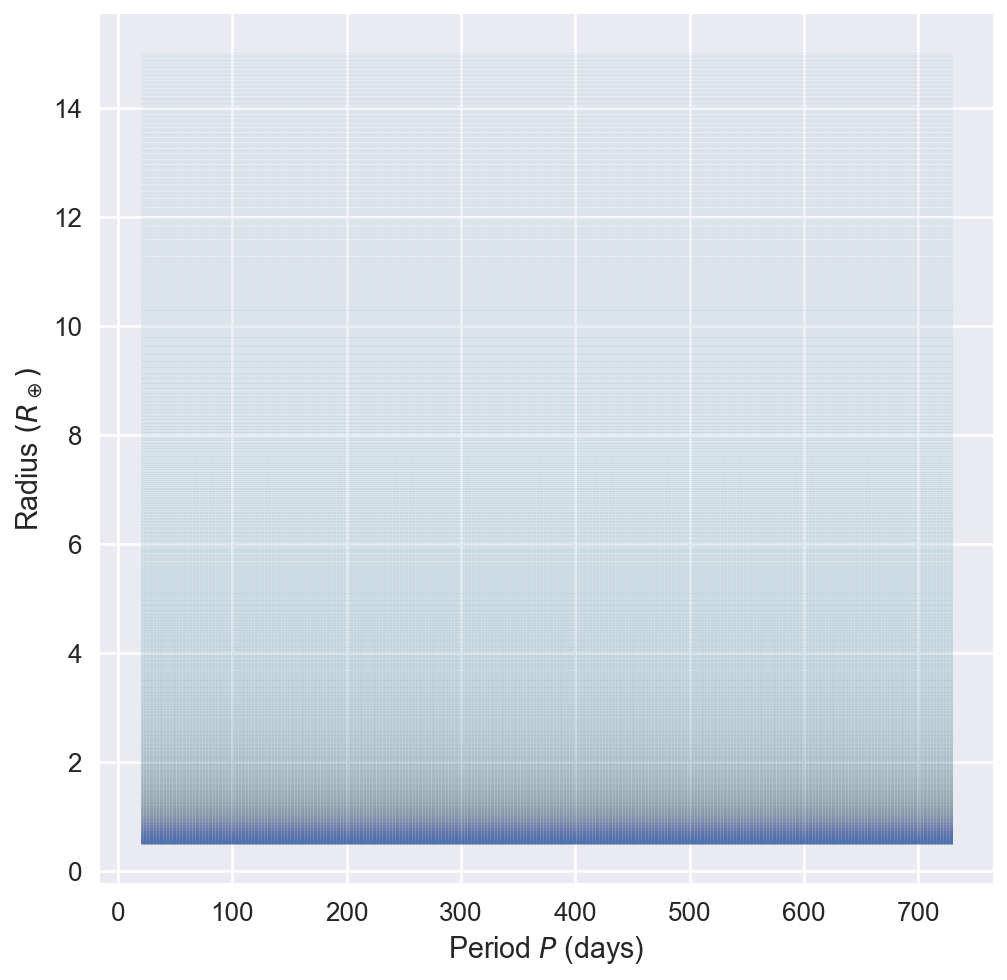

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(xf, yf, '.', alpha=0.3, ms=0.2)
plt.xlabel('Period $P$ (days)')
plt.ylabel('Radius $(R_\oplus)$');

It's a pretty densely sampled space.

In [7]:
# Define the stellar and noise properties needed for detection contour
# Begin by making an instance of the class that holds the properties
#  of detection contour
# Parameters available from the DR25 Stellar and Occurrence product
#   table hosted at NASA Exoplanet Archive
doit = kepler_single_comp_data()
doit.id = 3429335
doit.rstar = 0.798
doit.logg = 4.578
doit.teff = 5554.0
doit.dataspan = 1458.93
doit.dutycycle = 0.874
doit.limbcoeffs = np.array([0.4869,0.05340,0.5129,-0.3007])
doit.cdppSlopeLong = -0.4564
doit.cdppSlopeShort = -0.7051

In [8]:
# Define detection grid and path to the window function and one-sigma depth
#  function tables
doit.period_want = period_want_orig
doit.rp_want = rp_want_orig
doit.ecc = 0.0
doit.planet_detection_metric_path = ''

In [9]:
# All parameters are set, generate detection contour and detection efficiency
#  curve
probdet, probtot, DEMod = kepler_single_comp_dr25(doit)

In [10]:
probdet.shape, probtot.shape

((2000, 3000), (2000, 3000))

In [11]:
# Make figure of Detection Efficiency and its smeared version
tmpMes = np.linspace(0.0, 30.0, 1000)
tmpDE = DEMod.detEffFunctions[0](tmpMes)
tmpSmearDE = DEMod.detEffSmearFunctions[0](tmpMes)

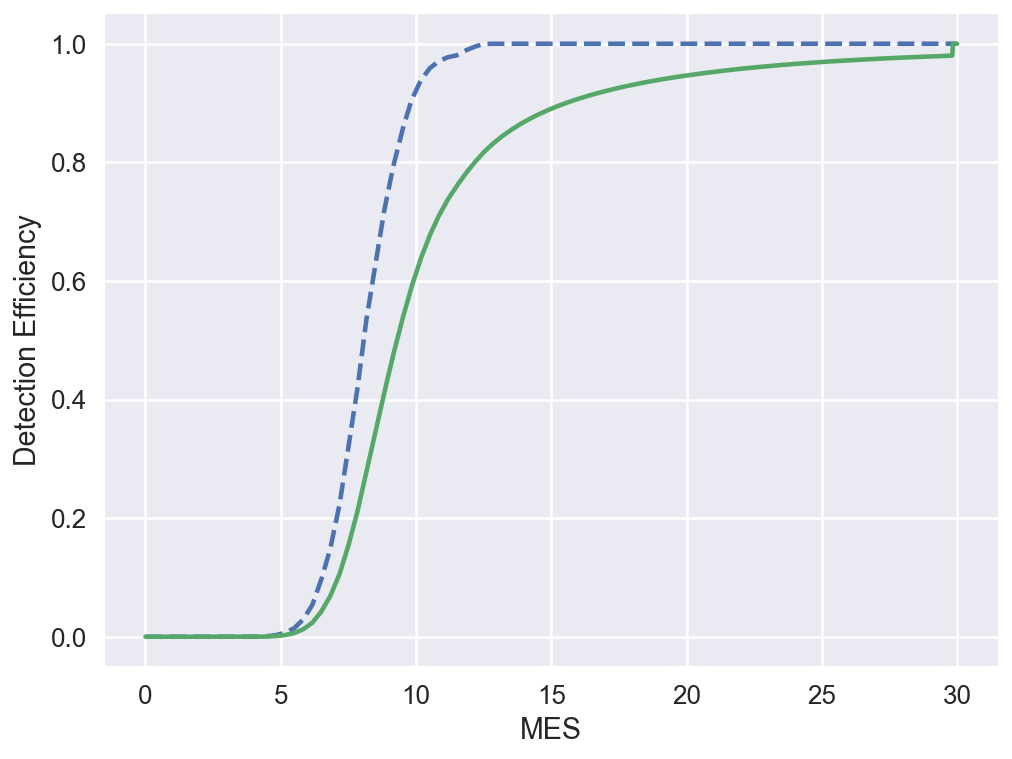

In [12]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
plt.plot(tmpMes, tmpDE, '--')
plt.plot(tmpMes, tmpSmearDE, '-')
plt.xlabel('MES')
plt.ylabel('Detection Efficiency');

In [13]:
# Make figure of detection contour
X, Y = np.meshgrid(np.log10(period_want_orig), np.log10(rp_want_orig))
uselevels = [0.0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]

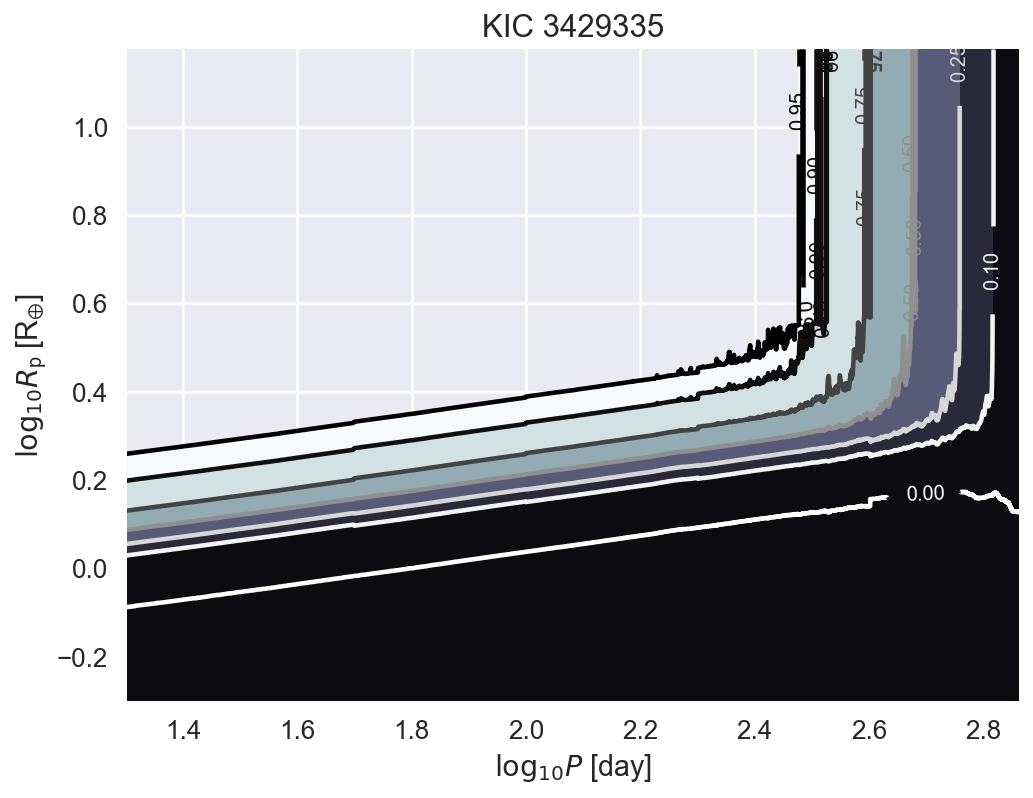

In [14]:
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

CS2 = plt.contour(X, Y, probdet, levels=uselevels)
plt.clabel(CS2, inline=1, fmt='%1.2f', inline_spacing=10.0)
CS1 = plt.contourf(X, Y, probdet, levels=uselevels, cmap=plt.cm.bone)    
plt.xlabel('$\log_{10}{P}$ [day]')
plt.ylabel('$\log_{10}{R_{\mathregular{p}}}$ [R$_{\mathregular{\oplus}}$]')
ax.set_title('KIC {0:d}'.format(doit.id))
plt.show()

The end! 